# **This is the notebook for the week three task the dataset extranal used is PAMPA Permeability, NCATS the step are below:**

- Downloaded the dataset
- Perform the preprocessing steps like standardization of smiles
- Generate InchyKey
- Run the predictions
- Evaluating the results

## **Import all the dependencies**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

## **Download the Dataset**:

In [188]:
!pip install PyTDC

  Using cached PyTDC-0.4.1.tar.gz (107 kB)
     |████████████████████████████████| 29.2 MB 426 kB/s 
  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)
     |████████████████████████████████| 24.8 MB 40.1 MB/s 
     |████████████████████████████████| 293 kB 47.7 MB/s 
     |████████████████████████████████| 268 kB 53.4 MB/s 
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
     |████████████████████████████████| 143 kB 49.5 MB/s 
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
     |████████████████████████████████| 11.2 MB 40.3 MB/s 
     |████████████████████████████████| 1.1 MB 30.1 MB/s 
     |████████████████████████████████| 103 kB 58.8 MB/s 
     |████████████████████████████████| 965 kB 55.4 MB/s 
  Created wheel for PyTDC: filename=PyTDC-0.4.1-py3-none-any.whl size=140662 sha256=404b303c0d6fc368c93d9a9c0861fb7d1a18ad9bcb6ce93c1f09644c8445ffa6
  Stored in direc

In [5]:
from tdc.single_pred import ADME
data = ADME(name = 'PAMPA_NCATS')
split = data.get_split()

Found local copy...
Loading...
Done!


In [6]:
# data_orignal = split['test']

In [26]:
data_orignal = data.get_approved_set()

Found local copy...
Loading...


## **Visulize the dataset**

In [27]:
data_orignal

,Drug_ID,Drug,Y
0,444,CC(C(=O)C1=CC(=CC=C1)Cl)NC(C)(C)C,0
1,1051,CC1=NC=C(C(=C1O)C=O)COP(=O)(O)O,1
2,1130,CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCO,1
3,1923,C1=CC2=C(C(=C1)O)N=CC=C2,0
4,2239,CC(C)(C)NCC(CSC1=NC(=CS1)C2=CC=C(S2)C(=O)N)O,1
...,...,...,...
137,135398744,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...,0
138,135449328,COCC(=O)Nc1cc(Sc2ccccc2)ccc1N=C(NC(=O)OC)NC(=O)OC,0
139,135449332,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N/Nc1cccc(-c2cc...,0
140,146014632,Cc1cc(C(=C2C=CC(=N)C=C2)c2ccc(N)cc2)ccc1N,1


In [28]:
data_orignal = data_orignal.drop_duplicates(subset=['Drug'])
data_orignal

,Drug_ID,Drug,Y
0,444,CC(C(=O)C1=CC(=CC=C1)Cl)NC(C)(C)C,0
1,1051,CC1=NC=C(C(=C1O)C=O)COP(=O)(O)O,1
2,1130,CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCO,1
3,1923,C1=CC2=C(C(=C1)O)N=CC=C2,0
4,2239,CC(C)(C)NCC(CSC1=NC(=CS1)C2=CC=C(S2)C(=O)N)O,1
...,...,...,...
137,135398744,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...,0
138,135449328,COCC(=O)Nc1cc(Sc2ccccc2)ccc1N=C(NC(=O)OC)NC(=O)OC,0
139,135449332,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N/Nc1cccc(-c2cc...,0
140,146014632,Cc1cc(C(=C2C=CC(=N)C=C2)c2ccc(N)cc2)ccc1N,1


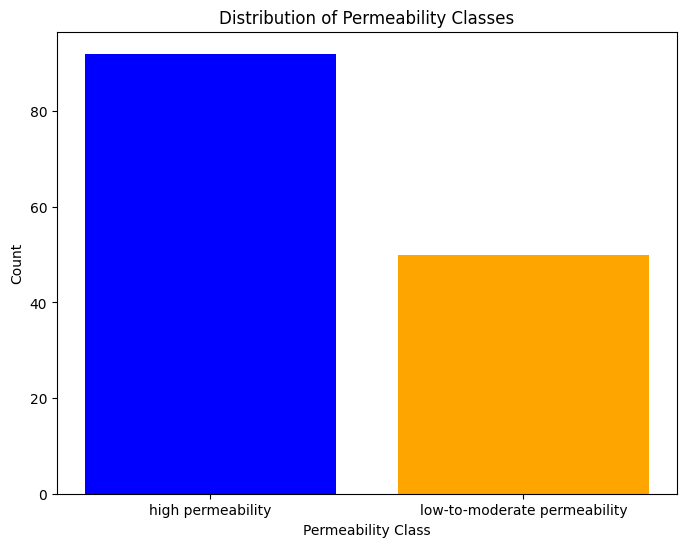

In [29]:
# Map label class to 'Y' column
label_map = {0: 'low-to-moderate permeability', 1: 'high permeability'}
data_orignal['Y_labels'] = data_orignal['Y'].map(label_map)

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(data_orignal['Y_labels'].value_counts().index, data_orignal['Y_labels'].value_counts().values, color=['blue', 'orange'])
plt.xlabel('Permeability Class')
plt.ylabel('Count')
plt.title('Distribution of Permeability Classes')
plt.show()

In [30]:
data_orignal

,Drug_ID,Drug,Y,Y_labels
0,444,CC(C(=O)C1=CC(=CC=C1)Cl)NC(C)(C)C,0,low-to-moderate permeability
1,1051,CC1=NC=C(C(=C1O)C=O)COP(=O)(O)O,1,high permeability
2,1130,CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCO,1,high permeability
3,1923,C1=CC2=C(C(=C1)O)N=CC=C2,0,low-to-moderate permeability
4,2239,CC(C)(C)NCC(CSC1=NC(=CS1)C2=CC=C(S2)C(=O)N)O,1,high permeability
...,...,...,...,...
137,135398744,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...,0,low-to-moderate permeability
138,135449328,COCC(=O)Nc1cc(Sc2ccccc2)ccc1N=C(NC(=O)OC)NC(=O)OC,0,low-to-moderate permeability
139,135449332,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N/Nc1cccc(-c2cc...,0,low-to-moderate permeability
140,146014632,Cc1cc(C(=C2C=CC(=N)C=C2)c2ccc(N)cc2)ccc1N,1,high permeability


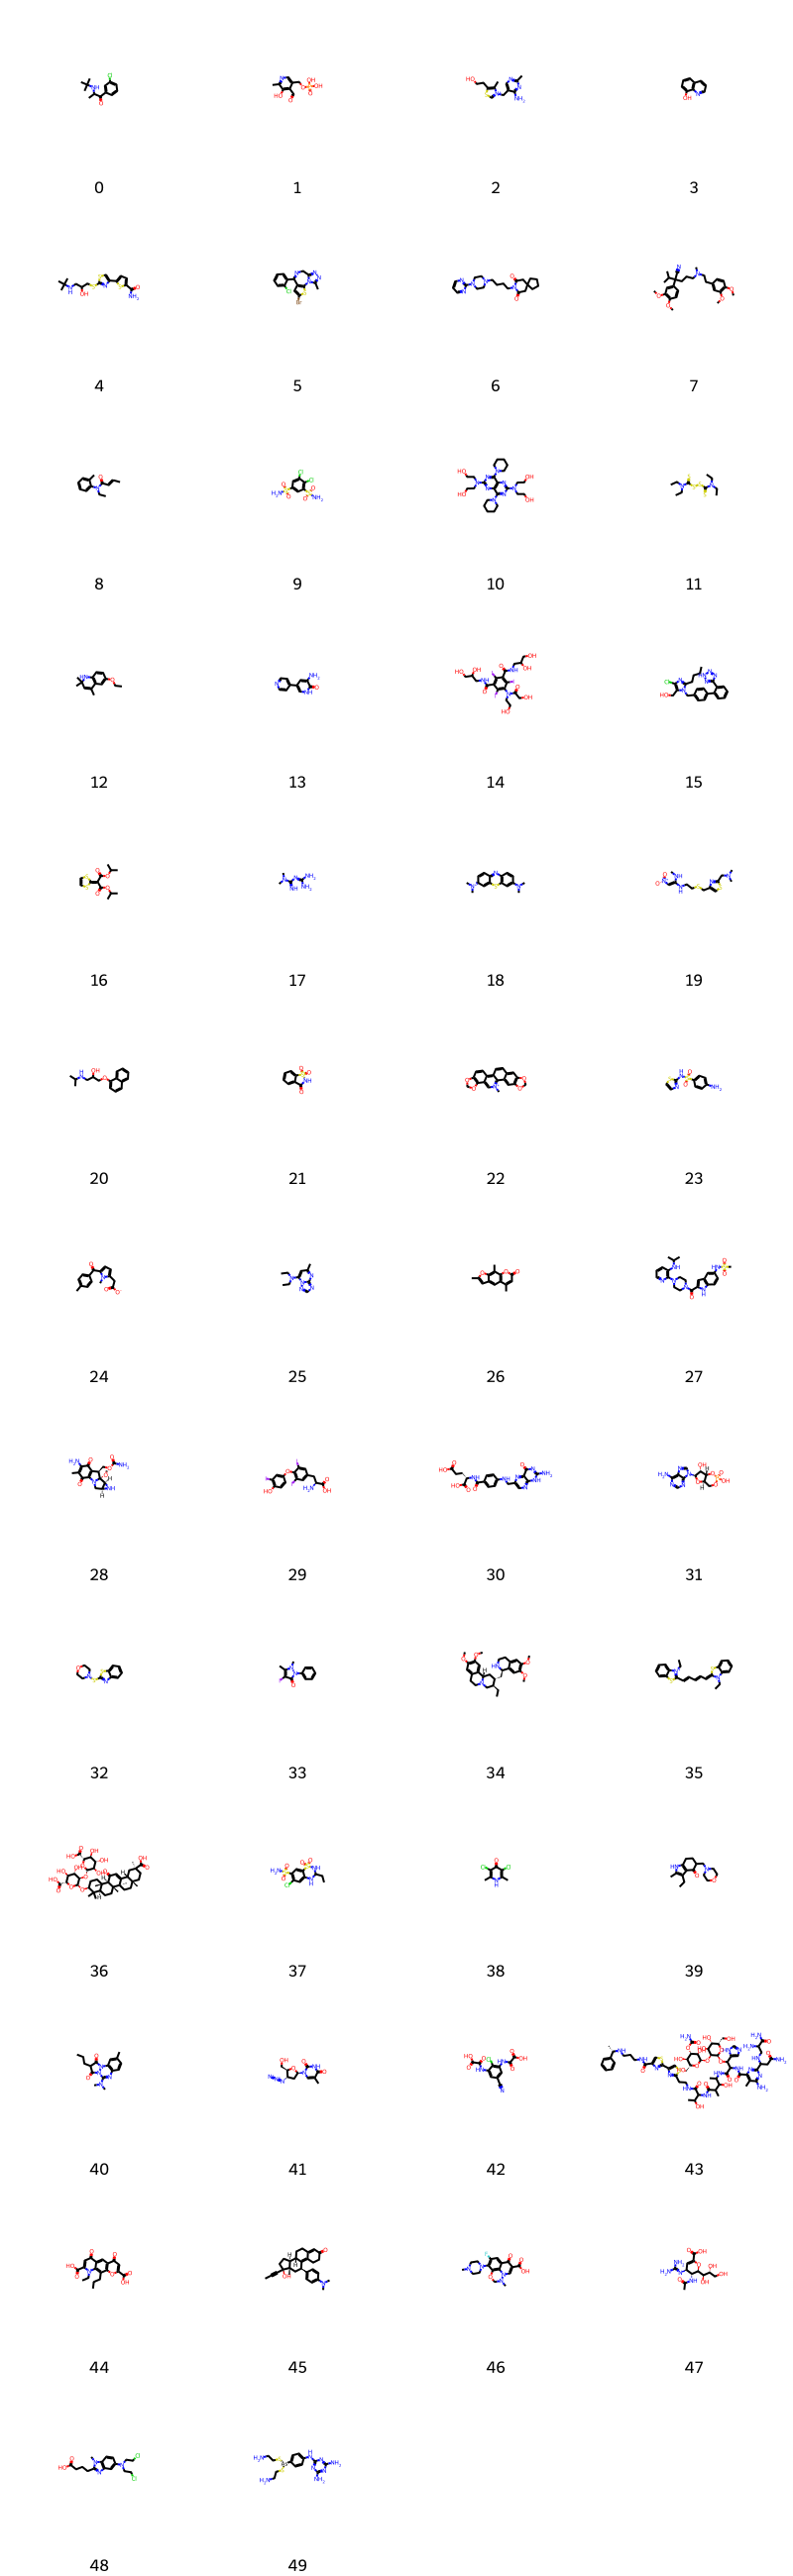

In [31]:
import pandas as pd
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
import math

# Assuming 'extracted_data' is your DataFrame
# Extract the SMILES column and molecule names
smiles_column = data_orignal['Drug']
molecule_names = data_orignal.index.astype(str).tolist()  # Convert index to string list

# Convert SMILES to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_column]

# Draw molecular structures and convert them to images with names
molecule_images = []
for molecule, name in zip(molecules, molecule_names):
    molecule_image = Draw.MolToImage(molecule, size=(200, 200))
    molecule_image_with_name = Draw.MolsToGridImage([molecule], molsPerRow=1, legends=[name], subImgSize=(200,200))
    molecule_images.append(molecule_image_with_name)

# Display molecular images in a grid
num_images = len(molecule_images)
num_cols = 4  # Number of columns in the grid
num_rows = math.ceil(num_images / num_cols)  # Number of rows needed
grid_image = Draw.MolsToGridImage(molecules, molsPerRow=num_cols, subImgSize=(200, 200), legends=molecule_names)
display(grid_image)

## **Preprocess the dataste, convert smiles to standrd and generate InchyKeys**

In [32]:
!pip install standardiser

In [33]:
# Convert Smiles to standrard
import os

# Store the current working directory
original_path = os.getcwd()

# Change directory to '/content/drive/MyDrive/Colab Notebooks/model-validation-example/src'
os.chdir('/content/drive/MyDrive/Colab Notebooks/model-validation-example/src')

# In this codeblock, you're working in the '/src' directory
# Import and use the function standardise_smiles from /src
from smiles_processing import standardise_smiles
std_smiles_column = standardise_smiles(smiles_column)

# Now, let's return to the original directory
os.chdir(original_path)


In [ ]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package
# Initialize a list to store InChIKeys
inchikeys = []

# Iterate through the standardized SMILES and convert them to molecules to get InChIKeys
for smiles in std_smiles_column:
    # Check if the smiles is a valid string
    if isinstance(smiles, str):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            inchikey = Chem.inchi.InchiToInchiKey(Chem.inchi.MolToInchi(mol))
            inchikeys.append(inchikey)
        else:
            # Handle if SMILES cannot be converted to a molecule
            inchikeys.append(None)
    else:
        # Handle if the value is not a string (e.g., NaN or float)
        inchikeys.append(None)

# Add the generated InChIKeys to your DataFrame or use them as needed

In [35]:
inchikeys[:10]

['SNPPWIUOZRMYNY-UHFFFAOYSA-N',
 'NGVDGCNFYWLIFO-UHFFFAOYSA-N',
 'JZRWCGZRTZMZEH-UHFFFAOYSA-N',
 'MCJGNVYPOGVAJF-UHFFFAOYSA-N',
 'BHIAIPWSVYSKJS-UHFFFAOYSA-N',
 'UMSGKTJDUHERQW-UHFFFAOYSA-N',
 'QWCRAEMEVRGPNT-UHFFFAOYSA-N',
 'SGTNSNPWRIOYBX-UHFFFAOYSA-N',
 'DNTGGZPQPQTDQF-UHFFFAOYSA-N',
 'GJQPMPFPNINLKP-UHFFFAOYSA-N']

In [36]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns.
# All data will be saved with informative names in the /Inputs
# Create a DataFrame with std_smiles_column and inchikeys
data_ = {'SMILES': std_smiles_column, 'InChIKey': inchikeys}
smiles = {'SMILES': std_smiles_column}
df = pd.DataFrame(data_)
df_smiles = pd.DataFrame(data_)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/model-validation-example/Inputs/std_smiles_inchukey_task3.csv')
df_smiles.to_csv('smiles.csv')
df_smiles

,SMILES,InChIKey
0,CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1,SNPPWIUOZRMYNY-UHFFFAOYSA-N
1,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,NGVDGCNFYWLIFO-UHFFFAOYSA-N
2,Cc1ncc(C[n+]2csc(CCO)c2C)c(N)n1,JZRWCGZRTZMZEH-UHFFFAOYSA-N
3,Oc1cccc2cccnc12,MCJGNVYPOGVAJF-UHFFFAOYSA-N
4,CC(C)(C)NCC(O)CSc1nc(-c2ccc(C(N)=O)s2)cs1,BHIAIPWSVYSKJS-UHFFFAOYSA-N
...,...,...
137,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...,BNRNXUUZRGQAQC-UHFFFAOYSA-N
138,COCC(=O)Nc1cc(Sc2ccccc2)ccc1N=C(NC(=O)OC)NC(=O)OC,HMCCXLBXIJMERM-UHFFFAOYSA-N
139,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N/Nc1cccc(-c2cc...,XDXWLKQMMKQXPV-HPNDGRJYSA-N
140,Cc1cc(C(=C2C=CC(=N)C=C2)c2ccc(N)cc2)ccc1N,WVYMEHMNEMRCEL-UHFFFAOYSA-N


## **Load the model and run the predictions**


- For that parctular dataset model being used [model link](https://github.com/ersilia-os/eos81ew)

- The website to downlod the data: [dataset link](https://tdcommons.ai/single_pred_tasks/adme/#pampa-permeability-ncats)

- The refernce paper [link](https://slas-discovery.org/action/showPdf?pii=S2472-5552%2822%2906765-X
)

In [17]:
import time
model_name = 'eos9tyg'
begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
⬇️  Fetching model eos9tyg: ncats-pampa74
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos9tyg: ncats-pampa74

   URL: http://127.

In [37]:
!ersilia serve $model_name
!ersilia run -i smiles.csv -o external_data_prediction_PAMPA.csv

/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos9tyg: ncats-pampa74

   URL: http://127.0.0.1:38009
   PID: 69791
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
external_data_prediction_PAMPA.csv


In [38]:
outputs = pd.read_csv('external_data_prediction_PAMPA.csv')

In [39]:
outputs

,key,input,pampa7.4_proba1
0,SNPPWIUOZRMYNY-UHFFFAOYSA-N,CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1,0.003
1,NGVDGCNFYWLIFO-UHFFFAOYSA-N,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,1.000
2,JZRWCGZRTZMZEH-UHFFFAOYSA-N,Cc1ncc(C[n+]2csc(CCO)c2C)c(N)n1,1.000
3,MCJGNVYPOGVAJF-UHFFFAOYSA-N,Oc1cccc2cccnc12,0.005
4,BHIAIPWSVYSKJS-UHFFFAOYSA-N,CC(C)(C)NCC(O)CSc1nc(-c2ccc(C(N)=O)s2)cs1,0.999
...,...,...,...
137,BNRNXUUZRGQAQC-UHFFFAOYSA-N,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...,0.968
138,HMCCXLBXIJMERM-UHFFFAOYSA-N,COCC(=O)Nc1cc(Sc2ccccc2)ccc1N=C(NC(=O)OC)NC(=O)OC,0.075
139,XDXWLKQMMKQXPV-HPNDGRJYSA-N,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N/Nc1cccc(-c2cc...,0.973
140,WVYMEHMNEMRCEL-UHFFFAOYSA-N,Cc1cc(C(=C2C=CC(=N)C=C2)c2ccc(N)cc2)ccc1N,1.000


In [40]:
# Convert pampa5_proba1 to binary values based on threshold 0.5
Y_pred = (outputs['pampa7.4_proba1'] > 0.5).astype(int)

# Display the DataFrame
Y = data_orignal['Y']

In [41]:
Y_pred

0      0
1      1
2      1
3      0
4      1
      ..
137    1
138    0
139    1
140    1
141    1
Name: pampa7.4_proba1, Length: 142, dtype: int64

In [42]:
Y

0      0
1      1
2      1
3      0
4      1
      ..
137    0
138    0
139    0
140    1
141    1
Name: Y, Length: 142, dtype: int64

In [43]:
outputs['pampa7.4_proba1']

0      0.003
1      1.000
2      1.000
3      0.005
4      0.999
       ...  
137    0.968
138    0.075
139    0.973
140    1.000
141    1.000
Name: pampa7.4_proba1, Length: 142, dtype: float64

Accuracy: 0.7676056338028169


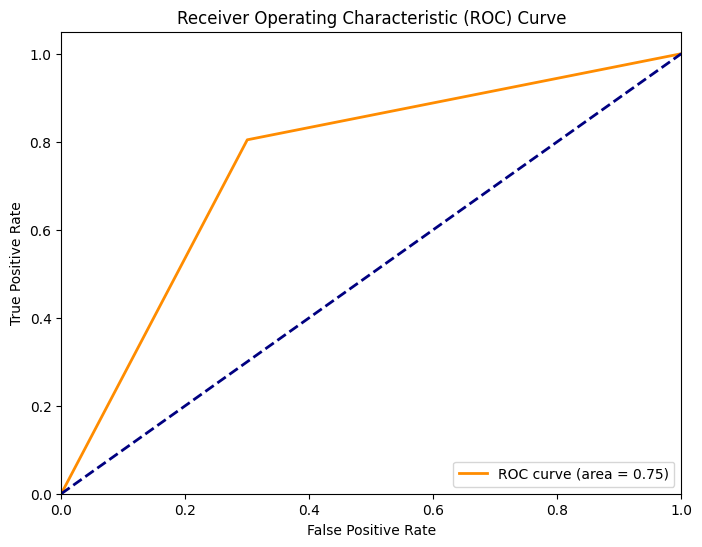

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y, Y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Compute confusion matrix
conf_matrix = confusion_matrix(Y, Y_pred)
accuracy = accuracy_score(Y, Y_pred)

print('Accuracy:', accuracy)

plt.show()
